# [개념 필사] - 파머완

## CHAPTER 08 **<텍스트 분석>**

> 텍스트 분석 (텍스트 마이닝)은 비정형 텍스트에서 유의미한 정보를 추출하는 것에 중점 (cf. NLP)

> NLP는 텍스트 분석을 더욱 향상하게 하는 기반 기술이라고도 할 수 있음.

> 룰 기반 텍스트 분석 -> 머신러닝 기반 텍스트 분석

> 비즈니스 인텔리전스, 예측 분석에 사용

✅ 텍스트 분류: 문서가 어떤 카테고리에 속하는지. 지도학습.

✅ 감성 분석: 텍스트에서의 주관적인 요소 분석. 지도, 비지도 가능.

✅ 텍스트 요약: 텍스트 내에서 중요한 주제, 중심 사상 추출. 토픽 모델링.

✅ 텍스트 군집화와 유사도 측정: 비슷한 문서 유형 군집화. 텍스트분류의 비지도학습 버전.  


## **8.1 텍스트 분석 이해**

◾**텍스트 분석**: 비정형 데이터인 텍스트를 분석하는 것.

* ✅ 피처 벡터화 (피처 추출): 텍스트를 word(또는 일부분) 기반의 다수의 피처로 추출하고, 이 피처에 단어 빈도수와 같은 "숫자값"을 부여함으로써 텍스트를 벡터값으로 표현하는 것. (머신러닝 적용을 위해 매우 중요)

* 방법: BOW(단어개수기반, TF-IDF 기반 등), Word2Vec

* 프로세스



1.   텍스트 전처리: 클렌징, 대(소)문자 변경, 특수문자 삭제, 토큰화, 무의미 단어 삭제, 어근 추출 등  
2.   피처 벡터화/추출: 전처리된 텍스트에서 피처 추출하고 벡터값 할당
3.   ML 모델 수립 및 학습/예측/평가


💻 NLTK: 가장 대표적인 NLP패키지이지만, 수행 속도 ⤵ 활용성 ⤵

💻 Genism: 토픽 모델링을 쉽게 구현가능한 기능. Word2Vec 같은 다양한 신기능 제공. 많이 사용.

💻 SpaCy: 뛰어난 수행 성능. 많이 사용.

⬜ 사이킷런 - 기본적인 텍스트 분석 가능 ⬜ **NLTK, Genism, SpaCy와 결합해 많이 사용함.**



## **8.2 텍스트 전처리 - 텍스트 정규화**

> 텍스트 자체를 바로 피처화할 수 없으므로, 사전에 텍스트 가공 필요.


◾**텍스트 정규화**: 텍스트를 ML, NLP에 입력 데이터로 사용하기 위해 클렌징, 정제, 토큰화, 어근화 등의 사전 작업을 수행하는 것.

💻 NLTK

* 클렌징: 불필요한문자, 기호 제거. HTML, XML태그 등

* 텍스트 토큰화

    -- 문장 토큰화: 문서에서 문장 분리. 일반적으로 문장 마지막 기호에 따라 분리. 정규 표현식 기반. 각 문장이 가지는 시맨틱적인 의미가 중요할 때 사용.

    💻 sent_tokenize() -> 각각의 문장으로 된 리스트 반환


    -- 단어 토큰화: 문장에서 단어 분리. 기본적으로는 공백, 콤마, 등으로 분리. 정규표현식 이용. 단어의 순서가 중요하지 않은 경우 단어토큰화만 사용해도 됨.

    💻 word_tokenize()  

    ❗단어 토큰화 시, 문맥적인 의미가 무시됨

    => n-gram: 연속된 n개 단어를 순차적으로 이동하며 토큰화.

* 스톱 워드 제거: 분석에 무의미한 단어들을 제거하는 작업. NLTK는 가장 다양한 언어의 스톱 워드 제공.
```
ltk.corpus.stopwords.words('언어')
```

* Stemming & Lemmatization: 문법적, 의미적으로 변화하는 단어의 원형을 찾는 작업. Lemmatization이 더 정교함. 시간 오래 걸림.

   -- stemming💻 Porter, Lancaster, Snowball Stemmer

   -- Lemmatization💻 WordNetLemmatizer



## **8.3 BOW (Bag of Words)**

◾**BOW 모델**: 문서가 가지는 모든 단어를 문맥, 순서를 무시하고 일괄적으로 빈도값을 부여해 피처값을 추출하는 모델.

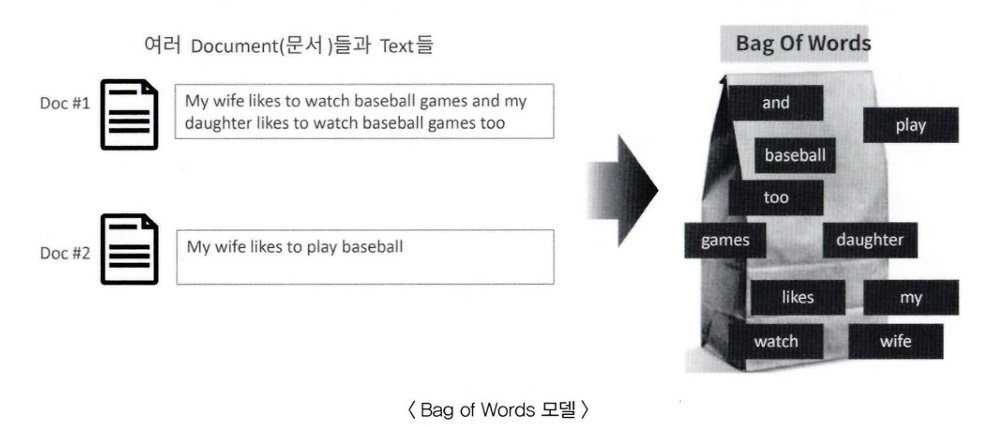

* 쉽고 빠른 구축. 단순하지만 문서의 특징을 잘 나타냄.

* 문맥 의미 반영 부족, 희소 행렬 문제 (많은 단어들 중 대부분이 0값으로 채워져, 희소행렬이 많아져 성능 감소)

> **◾BOW 피처 벡터화**: 텍스트를 특정 의미를 가지는 숫자값(벡터값)으로 변환하는 것.

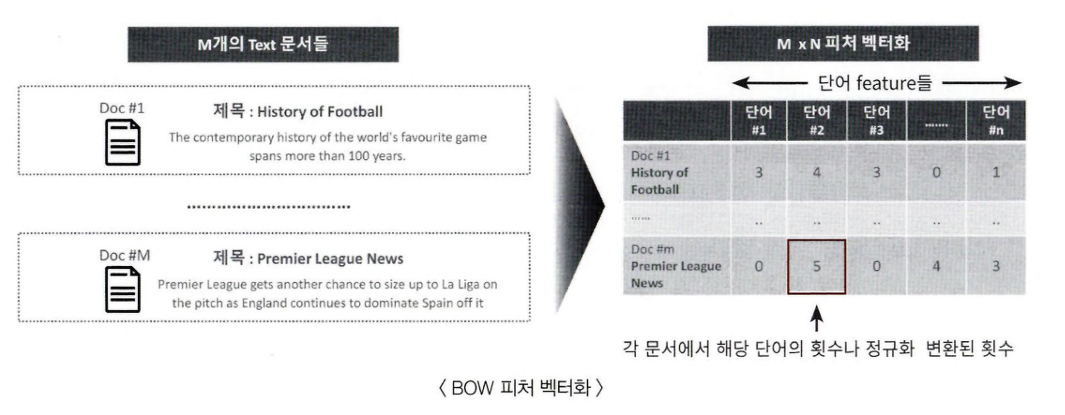

* 카운트 기반: 해당 단어의 빈도를 벡터값으로 부여.  

* TF-IDF 기반: 개별 문서에서 자주 나타나는 단어에 높은 가중치, 모든 문서에서 전반적으로 나타나는 단어에는 페널티.



> 💻 CountVectorizer

* 사이킷런의 카운트 기반 벡터화 구현 클래스

* 텍스트 전처리도 함께 수행

```
max_df: 너무 높은 빈도수의 단어 피처 제외하기 위함. 이하로 나타나는 단어만 추출

min_df: 너무 낮은 빈도수도 가비지성 단어이므로 추출X

max_features: 추출하는 피터 개수를 제한함

stop_words: 설정 언어의 스톱워드 단어 제외

n_gram_range: n_gram범위 설정해 순서 보강

analyzer: 피처추출 수행 단위 지정. 디폴트는 단어추출

tocken_pattern: 토큰화 정규 표현식 패턴 지정

tokenizer: 별도의 커스텀 함수 이용시 적용. 어근 변환 함수를 적용하여 Stemming, Lemmatization 수행 가능.
```

* 프로세스

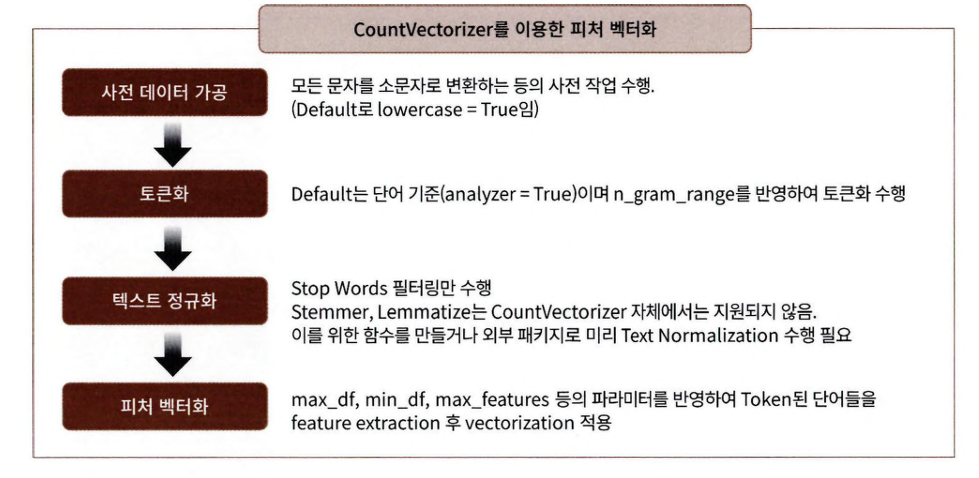


> 💻 TfidfVectorizer (CountVectorizer와 동일)


> BOW 벡터화를 위한 희소 행렬


❗피처 벡터화 시, 많은 피처칼럼이 생길 수 밖에 없음. 그러한 대규모 행렬 중 0으로 채워진 행렬이 많음.

* 희소 행렬: 대규모 행렬의 대부분의 값을 0이 차지하는 행렬. BOW 형태의 언어모델 피처 벡터화는 대부분 희소행렬

❗불필요한 0값으로 인한 메모리 공간 소모. 시간 소모.

=> 적은 메모리 공간을 차지하도록 변환해야함

=> COO, CSR


**◾COO 형식**: 0이 아닌 데이터만 별도의 데이터 array에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장.

💻 Scipy의 sparse 패키지

```
coo_matrix - COO 형식으로 희소 행렬 변환

sparse_coo - 희소 행렬 객체 변수
```


**◾CSR 형식**: 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 방식. COO 문제점 해결. 맨 마지막에는 데이터츼 총 항목 개수를 배열에 추가.

💻 Scipy의 sparse 패키지
```
scr_matrix - 0이 아닌 데이터 배열, 열 위치 배열, 행 위치 배열의 고유한 값의 시작 위치 배열 입력.
```

* CountVectorizer, TfidfVectorizer로 변환된 피처 벡터화 행렬은 모두 사이파이 CSR 형태.








# [코드 필사]

In [20]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [6]:
## 문장 토큰화 + 단어 토큰화

from nltk import word_tokenize, sent_tokenize

# 문장 토큰화 후 단어 토큰화하는 함수 생성
def tokenize_text(text):

    # 문장별로 분리
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장들에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


In [7]:
## 스톱워드 확인
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [9]:
## word_tokens 에 대해 스톱워드 제거
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
for sentence in word_tokens:
    filtered_words=[]
    for word in sentence:
        word = word.lower() # 소문자 변환
        if word not in stopwords:
            filtered_words.append(word) # 토큰화됐던 단어가 스톱워드에 포함되지 않으면 word_tokens에 추가
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


In [10]:
## Stemming vs. Lemmatization

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


* amuse 의 원형을 잘못 인식.

* happy, fancy 도 오류

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# 단어의 품사 입력해줘야함
lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


* 더 정확하게 추출됨

In [13]:
## sparse 희소 행렬 변환 - COO
import numpy as np

dense = np.array( [[3,0,1],[0,2,0]])

In [14]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행, 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [15]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [16]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CRS 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [17]:
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)